In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdate

In [5]:
#* Get data from Stooq
df = pd.read_csv("https://stooq.com/q/d/l/?s=btc.v&d1=20190101&d2=20221231&i=d")

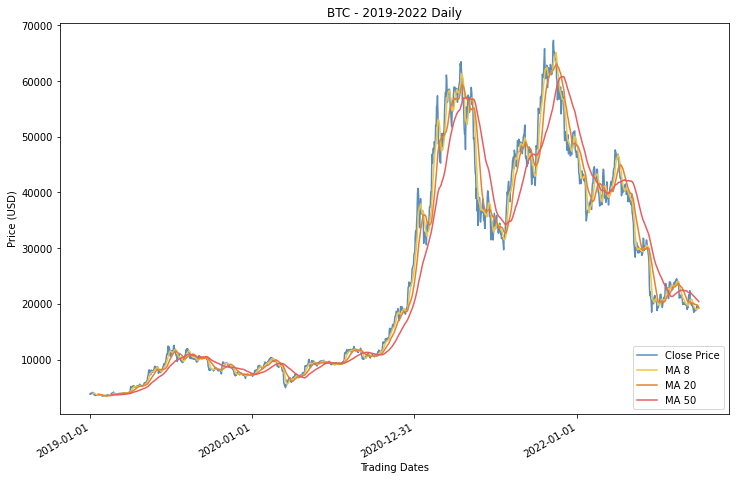

In [6]:
df.tail()

locator = mdate.YearLocator()
df.index = pd.Index(df.Date)
df = df[['Close']]

df['Base'] = df.Close
df['MA8'] = df.Close.rolling(window=8).mean()
df['MA20'] = df.Close.rolling(window=20).mean()
df['MA50'] = df.Close.rolling(window=50).mean()


plt.figure(figsize=(12, 8))
plt.title('BTC - 2019-2022 Daily')

plt.plot(df.index, df[['Base']],"#5a8dbc")
plt.plot(df.index, df[['MA8']],"#efc443")
plt.plot(df.index, df[['MA20']],"#e58130")
plt.plot(df.index, df[['MA50']],"#e55e62")

plt.xlabel('Trading Dates')
plt.ylabel('Price (USD)')
plt.xticks(df.index[::12], rotation='vertical')
plt.gca().xaxis.set_major_locator(locator)
plt.gcf().autofmt_xdate()
plt.legend(('Close Price','MA 8', 'MA 20','MA 50'), loc='lower right')
plt.show()